# First Project 
## Movie Data Analysis

- This is a movie dataset that contains over 60,000 movies from 1975 to 2025.


### Movie Dataset - Column Descriptions

| **Column Name**             | **Description**                                                                 |
|----------------------------|---------------------------------------------------------------------------------|
| `IMDb ID of the Movie`     | A unique identifier assigned to each movie by IMDb.                            |
| `title`                    | The official title of the movie.                                               |
| `year`                     | The release year of the movie. Useful for trend analysis.                      |
| `duration`                 | Runtime of the movie (e.g., "2h 15m"). Should be converted to minutes.         |
| `MPA`                      | Motion Picture Association rating (e.g., G, PG-13, R).                         |
| `rating`                   | Average IMDb user rating (scale of 0 to 10).                                   |
| `votes`                    | Number of users who rated the movie. Reflects popularity.                      |
| `meta_score`               | Critic rating from Metacritic (0–100 scale).                                   |
| `description`              | Short plot summary or synopsis of the movie.                                   |
| `Movie_Link`               | URL to the IMDb page for the movie.                                            |
| `writers`                  | List of writers involved in the movie.                                         |
| `directors`                | List of directors. Useful for analyzing directorial influence.                 |
| `stars`                    | Leading actors or actresses in the movie.                                      |
| `budget`                   | Estimated production budget (initially in mixed currencies).                   |
| `opening_weekend_gross`    | Revenue collected during the opening weekend.                                  |
| `gross_worldwide`          | Total global box office revenue.                                               |
| `gross_us_canada`          | Revenue from the US and Canada markets only.                                   |
| `release_date`             | Date the movie was officially released.                                        |
| `countries_origin`         | Country or countries where the movie was produced.                             |
| `filming_locations`        | Main locations where the movie was shot.                                       |
| `production_companies`     | Companies that produced or funded the movie.                                   |
| `awards_content`           | Awards won or nominated (if available).                                        |
| `genres`                   | Genre(s) of the movie (e.g., Drama, Action, Comedy).                           |
| `languages`                | Languages spoken in the movie.                                                 |


## Business Problem 

In the highly competitive and capital-intensive film industry, producers, investors, and studios constantly face the challenge of deciding **which types of movies to fund** and how to **maximize return on investment (ROI)**. With increasing production costs and changing audience preferences, relying solely on intuition is risky.

This project aims to solve the business problem of **identifying the key factors that contribute to a movie's financial and critical success**. By analyzing historical movie data—including variables such as **budget, genres, duration, ratings, country of origin, and box office performance**—the analysis provides data-driven insights that help stakeholders:

- Allocate budgets more effectively  
- Choose genres and release periods with higher success potential  
- Understand audience preferences based on movie features  
- Minimize investment risks while maximizing profit and impact  

Ultimately, this analysis empowers industry decision-makers to make informed and strategic choices that enhance both **financial outcomes** and **viewer satisfaction**.


In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import re, math
import matplotlib.pyplot as plt

In [2]:
# Reading the movie dataset from a CSV file
moviedata = pd.read_csv('Movie DataSet/final_dataset.csv')

moviedata

,id,title,year,duration,MPA,rating,votes,meta_score,description,Movie_Link,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,https://www.imdb.com/title/tt0073195,...,"$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,https://www.imdb.com/title/tt0073629,...,NaN,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...",https://www.imdb.com/title/tt0073486,...,NaN,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,https://www.imdb.com/title/tt0072890,...,NaN,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...",https://www.imdb.com/title/tt0073692,...,NaN,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,NaN,A guy and four of his friends visit his crippl...,https://www.imdb.com/title/tt0094976,...,NaN,NaN,NaN,1988.0,['United States'],"['Los Angeles, California, USA']",['City Lights Entertainment Group'],NaN,"['Slasher Horror', 'Horror']",['English']
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,NaN,When a courier at the D-Day Courier Service mi...,https://www.imdb.com/title/tt0094912,...,NaN,NaN,NaN,1988.0,"['United Kingdom', 'Ireland']","['Ardmore Studios, Herbert Road, Bray, County ...",['Bord Scannán na hÉireann / The Irish Film Bo...,NaN,"['Action', 'Crime', 'Thriller']","['Irish Gaelic', 'English']"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,NaN,"On their arrival in Mingan, on the north coast...",https://www.imdb.com/title/tt0093117,...,NaN,NaN,NaN,1988.0,['Canada'],"[""Île Nue, La réserve de parc national de l'Ar...","['Les Productions La Fête Inc.', 'Téléfilm Can...","Awards, 1 win & 6 nominations total","['Adventure', 'Comedy', 'Drama', 'Family']","['French', 'English']"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,NaN,A family moves into an old house in the Texas ...,https://www.imdb.com/title/tt0099235,...,NaN,NaN,NaN,1988.0,['United States'],"['Tucson, Arizona, USA']",['Indian Neck Entertainment'],NaN,"['Monster Horror', 'Supernatural Horror', 'Hor...",['English']


- This output displays the dataframe

In [3]:
# Displaying the last 10 rows of the DataFrame
moviedata.tail(10)

,id,title,year,duration,MPA,rating,votes,meta_score,description,Movie_Link,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
63239,tt0096445,Wildfire,1988,1h 34m,PG,4.5,219,NaN,Since they met the first time in boarding scho...,https://www.imdb.com/title/tt0096445,...,NaN,NaN,NaN,1988.0,['United States'],"['Marin County, California, USA']",NaN,NaN,['Drama'],['English']
63240,tt0096109,Silent Assassins,1988,1h 31m,NaN,4.8,337,NaN,The evil criminal leader Kendrick has kidnappe...,https://www.imdb.com/title/tt0096109,...,NaN,NaN,NaN,1988.0,['United States'],"['Oakland, California, USA']","['Action Brothers Productions Inc.', 'Panache ...",NaN,['Action'],['English']
63241,tt0096414,On the Run,1988,1h 28m,R,7.0,689,NaN,"Hsiang Ming's wife is murdered, prompting him ...",https://www.imdb.com/title/tt0096414,...,NaN,NaN,NaN,1988.0,['Hong Kong'],NaN,"['Bo Ho Film Company Ltd.', 'Golden Harvest Co...",NaN,"['Crime', 'Thriller']",['Cantonese']
63242,tt0094969,Deadly Dreams,1988,1h 19m,R,4.8,552,NaN,"From the director of the highly acclaimed ""Bod...",https://www.imdb.com/title/tt0094969,...,NaN,NaN,NaN,1988.0,['United States'],"['Santa Monica, California, USA (main location)']","['Concorde Pictures', 'Pacific Trust']",NaN,"['Slasher Horror', 'Horror', 'Thriller']",['English']
63243,tt0094935,The Diary of a Big Man,1988,1h 26m,NaN,6.7,582,NaN,A two-timing bigamist finds himself concocting...,https://www.imdb.com/title/tt0094935,...,NaN,NaN,NaN,1988.0,['Hong Kong'],"['Hong Kong, China']","['Cinema City', 'Film Workshop']","Awards, 1 nomination total","['Comedy', 'Romance']",['Cantonese']
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,NaN,A guy and four of his friends visit his crippl...,https://www.imdb.com/title/tt0094976,...,NaN,NaN,NaN,1988.0,['United States'],"['Los Angeles, California, USA']",['City Lights Entertainment Group'],NaN,"['Slasher Horror', 'Horror']",['English']
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,NaN,When a courier at the D-Day Courier Service mi...,https://www.imdb.com/title/tt0094912,...,NaN,NaN,NaN,1988.0,"['United Kingdom', 'Ireland']","['Ardmore Studios, Herbert Road, Bray, County ...",['Bord Scannán na hÉireann / The Irish Film Bo...,NaN,"['Action', 'Crime', 'Thriller']","['Irish Gaelic', 'English']"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,NaN,"On their arrival in Mingan, on the north coast...",https://www.imdb.com/title/tt0093117,...,NaN,NaN,NaN,1988.0,['Canada'],"[""Île Nue, La réserve de parc national de l'Ar...","['Les Productions La Fête Inc.', 'Téléfilm Can...","Awards, 1 win & 6 nominations total","['Adventure', 'Comedy', 'Drama', 'Family']","['French', 'English']"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,NaN,A family moves into an old house in the Texas ...,https://www.imdb.com/title/tt0099235,...,NaN,NaN,NaN,1988.0,['United States'],"['Tucson, Arizona, USA']",['Indian Neck Entertainment'],NaN,"['Monster Horror', 'Supernatural Horror', 'Hor...",['English']
63248,tt0155726,Grandi cacciatori,1988,1h 38m,NaN,5.9,90,NaN,"After a man's wife is killed by a panther, his...",https://www.imdb.com/title/tt0155726,...,NaN,NaN,NaN,1988.0,['Italy'],"['Alaska, USA']",NaN,NaN,['Adventure'],['Italian']


 - This output shows the last 10 rows of the data frame

In [4]:
# running the info() method to get a quick summary of the DataFrame
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63249 non-null  object 
 1   title                  63249 non-null  object 
 2   year                   63249 non-null  int64  
 3   duration               61174 non-null  object 
 4   MPA                    41227 non-null  object 
 5   rating                 59181 non-null  float64
 6   votes                  59181 non-null  object 
 7   meta_score             15533 non-null  float64
 8   description            60889 non-null  object 
 9   Movie_Link             63249 non-null  object 
 10  writers                62980 non-null  object 
 11  directors              63198 non-null  object 
 12  stars                  62905 non-null  object 
 13  budget                 15359 non-null  object 
 14  opening_weekend_gross  16837 non-null  object 
 15  gr

 - This output gives a basic information about the data 

In [5]:
# Checking for missing/null values in the DataFrame
moviedata.isnull().sum()


id                           0
title                        0
year                         0
duration                  2075
MPA                      22022
rating                    4068
votes                     4068
meta_score               47716
description               2360
Movie_Link                   0
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide          42527
gross_us_canada          43705
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
awards_content           36181
genres                     787
languages                  330
dtype: int64

- This output checks the columns with null values in the data

## Data Cleaning

In [6]:
# Data Cleaning
# First is to remove columns that are not needed
#"Movie_Link", "release_date",
moviedata.drop(columns=["Movie_Link", "release_date"], inplace=True)

# Used inplace=True to modify the original DataFrame

moviedata


,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,"['Peter Benchley', 'Carl Gottlieb']",...,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,"[""Richard O'Brien"", 'Jim Sharman']",...,"$1,200,000 (estimated)",NaN,"$115,827,018","$112,892,319","['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...","['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']",...,"$3,000,000 (estimated)",NaN,"$109,115,366","$108,981,275",['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']",...,"$1,800,000 (estimated)",NaN,"$50,004,527","$50,000,000",['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...","['Robert Towne', 'Warren Beatty']",...,"$4,000,000 (estimated)",NaN,"$49,407,734","$49,407,734",['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,NaN,A guy and four of his friends visit his crippl...,"['Thomas Dewier', 'Susan Trabue']",...,NaN,NaN,NaN,NaN,['United States'],"['Los Angeles, California, USA']",['City Lights Entertainment Group'],NaN,"['Slasher Horror', 'Horror']",['English']
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,NaN,When a courier at the D-Day Courier Service mi...,['Frank Deasy'],...,NaN,NaN,NaN,NaN,"['United Kingdom', 'Ireland']","['Ardmore Studios, Herbert Road, Bray, County ...",['Bord Scannán na hÉireann / The Irish Film Bo...,NaN,"['Action', 'Crime', 'Thriller']","['Irish Gaelic', 'English']"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,NaN,"On their arrival in Mingan, on the north coast...","['Jean-Claude Lord', 'Lise Thouin', 'Jacques B...",...,NaN,NaN,NaN,NaN,['Canada'],"[""Île Nue, La réserve de parc national de l'Ar...","['Les Productions La Fête Inc.', 'Téléfilm Can...","Awards, 1 win & 6 nominations total","['Adventure', 'Comedy', 'Drama', 'Family']","['French', 'English']"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,NaN,A family moves into an old house in the Texas ...,"['David Henry Keller', 'John Woodward', 'Darry...",...,NaN,NaN,NaN,NaN,['United States'],"['Tucson, Arizona, USA']",['Indian Neck Entertainment'],NaN,"['Monster Horror', 'Supernatural Horror', 'Hor...",['English']


- This output shows a clean data after droping the unwanted columns

In [7]:
# checking for duplicate rows in the DataFrame
moviedata.duplicated().sum()

0

In [8]:
# removing [] in the columns  'directors','stars','writers', 'genres', 'countries_origin ', 'languages', 'production_companies' and 'filming_locations'
moviedata['directors'] = moviedata['directors'].str.replace('[', '').str.replace(']', '')
moviedata['stars'] = moviedata['stars'].str.replace('[', '').str.replace(']', '')
moviedata['writers'] = moviedata['writers'].str.replace('[', '').str.replace(']', '')
moviedata['genres'] = moviedata['genres'].str.replace('[', '').str.replace(']', '')
moviedata['countries_origin'] = moviedata['countries_origin'].str.replace('[', '').str.replace(']', '')
moviedata['languages'] = moviedata['languages'].str.replace('[', '').str.replace(']', '')
moviedata['production_companies'] = moviedata['production_companies'].str.replace('[', '').str.replace(']', '')
moviedata['filming_locations'] = moviedata['filming_locations'].str.replace('[', '').str.replace(']', '')
# Displaying the cleaned Data
moviedata

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,"'Peter Benchley', 'Carl Gottlieb'",...,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",'United States',"""Water Street, Edgartown, Martha's Vineyard, M...","'Zanuck/Brown Productions', 'Universal Pictures'","Won 3 Oscars, 16 wins & 20 nominations total","'Monster Horror', 'Sea Adventure', 'Survival',...",'English'
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,"""Richard O'Brien"", 'Jim Sharman'",...,"$1,200,000 (estimated)",NaN,"$115,827,018","$112,892,319","'United Kingdom', 'United States'","""Oakley Court, Windsor Road, Oakley Green, Win...","'Twentieth Century Fox', 'Michael White Produc...","Awards, 3 wins & 4 nominations total","'B-Horror', 'Dark Comedy', 'Parody', 'Raunchy ...",'English'
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...","'Lawrence Hauben', 'Bo Goldman', 'Ken Kesey'",...,"$3,000,000 (estimated)",NaN,"$109,115,366","$108,981,275",'United States','Oregon State Mental Hospital - 2600 Center St...,"'Fantasy Films', 'N.V. Zvaluw'","Won 5 Oscars, 38 wins & 15 nominations total","'Medical Drama', 'Psychological Drama', 'Drama'",'English'
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,"'Frank Pierson', 'P.F. Kluge', 'Thomas Moore'",...,"$1,800,000 (estimated)",NaN,"$50,004,527","$50,000,000",'United States',"'285 Prospect Park West, Brooklyn, New York Ci...","'Warner Bros.', 'Artists Entertainment Complex'","Won 1 Oscar, 14 wins & 20 nominations total","'Dark Comedy', 'Heist', 'True Crime', 'Biograp...",'English'
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...","'Robert Towne', 'Warren Beatty'",...,"$4,000,000 (estimated)",NaN,"$49,407,734","$49,407,734",'United States',"""2270 Bowmont Drive, Beverly Hills, California...","'Persky-Bright / Vista', 'Columbia Pictures', ...","Won 1 Oscar, 3 wins & 11 nominations total","'Satire', 'Comedy', 'Drama'",'English'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,NaN,A guy and four of his friends visit his crippl...,"'Thomas Dewier', 'Susan Trabue'",...,NaN,NaN,NaN,NaN,'United States',"'Los Angeles, California, USA'",'City Lights Entertainment Group',NaN,"'Slasher Horror', 'Horror'",'English'
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,NaN,When a courier at the D-Day Courier Service mi...,'Frank Deasy',...,NaN,NaN,NaN,NaN,"'United Kingdom', 'Ireland'","'Ardmore Studios, Herbert Road, Bray, County W...",'Bord Scannán na hÉireann / The Irish Film Boa...,NaN,"'Action', 'Crime', 'Thriller'","'Irish Gaelic', 'English'"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,NaN,"On their arrival in Mingan, on the north coast...","'Jean-Claude Lord', 'Lise Thouin', 'Jacques Bo...",...,NaN,NaN,NaN,NaN,'Canada',"""Île Nue, La réserve de parc national de l'Arc...","'Les Productions La Fête Inc.', 'Téléfilm Cana...","Awards, 1 win & 6 nominations total","'Adventure', 'Comedy', 'Drama', 'Family'","'French', 'English'"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,NaN,A family moves into an old house in the Texas ...,"'David Henry Keller', 'John Woodward', 'Darryl...",...,NaN,NaN,NaN,NaN,'United States',"'Tucson, Arizona, USA'",'Indian Neck Entertainment',NaN,"'Monster Horror', 'Supernatural Horror', 'Horror'",'English'




- This output displays a cleaned dataset where square brackets (`[]`) have been removed from columns that originally contained them.


In [9]:
# removing '' and "" in the columns 'directors', 'stars', 'writers', 'genres', 'countries_origin', 'languages', 'production_companies' and 'filming_locations'
moviedata['directors'] = moviedata['directors'].str.replace("'", "").str.replace('"', '')
moviedata['stars'] = moviedata['stars'].str.replace("'", "").str.replace('"', '')
moviedata['writers'] = moviedata['writers'].str.replace("'", "").str.replace('"', '')
moviedata['genres'] = moviedata['genres'].str.replace("'", "").str.replace('"', '')
moviedata['countries_origin'] = moviedata['countries_origin'].str.replace("'", "").str.replace('"', '')
moviedata['languages'] = moviedata['languages'].str.replace("'", "").str.replace('"', '')
moviedata['production_companies'] = moviedata['production_companies'].str.replace("'", "").str.replace('"', '')
moviedata['filming_locations'] = moviedata['filming_locations'].str.replace("'", "").str.replace('"', '')
# Displaying the cleaned Data
moviedata

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,"$1,200,000 (estimated)",NaN,"$115,827,018","$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,"$3,000,000 (estimated)",NaN,"$109,115,366","$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,"$1,800,000 (estimated)",NaN,"$50,004,527","$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,"$4,000,000 (estimated)",NaN,"$49,407,734","$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,NaN,NaN,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,NaN,NaN,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,NaN,NaN,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,NaN,NaN,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English


- This output displays a clean dataset after removing "" from columns that contained it

In [10]:
# Converting 'votes' column to numeric values
# The 'votes' column contais values like '1K' or'2.5M'
# We will convert these to numeric values for easier analysis

def convert_votes(v):
    try:
        if isinstance(v, str):
            v = v.upper().strip()
            if 'K' in v:
                return float(v.replace('K', '')) * 1_000
            elif 'M' in v:
                return float(v.replace('M', '')) * 1_000_000
            else:
                return float(v.replace(',', ''))
        return float(v)
    except:
        return np.nan

# Apply conversion
moviedata['votes'] = moviedata['votes'].apply(convert_votes)

moviedata

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690000.0,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174000.0,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,"$1,200,000 (estimated)",NaN,"$115,827,018","$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1100000.0,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,"$3,000,000 (estimated)",NaN,"$109,115,366","$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281000.0,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,"$1,800,000 (estimated)",NaN,"$50,004,527","$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15000.0,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,"$4,000,000 (estimated)",NaN,"$49,407,734","$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402.0,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,NaN,NaN,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143.0,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,NaN,NaN,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454.0,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,NaN,NaN,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1100.0,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,NaN,NaN,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English


- This output displays a clean dataset after changing the votes column to numeric value.

In [11]:
# changing the duration column to numeric values and to minutes instead of hours and minutes
# The 'duration' column contains values like '1h 30m', '2h'or '45m'.
def convert_duration(duration):
    try:
        if isinstance(duration, str):
            duration = duration.strip()
            if 'h' in duration and 'm' in duration:
                hours, minutes = duration.split('h')
                return int(hours) * 60 + int(minutes.replace('m', '').strip())
            elif 'h' in duration:
                return int(duration.replace('h', '').strip()) * 60
            elif 'm' in duration:
                return int(duration.replace('m', '').strip())
        return np.nan
    except:
        return np.nan
# Apply conversion
moviedata['duration'] = moviedata['duration'].apply(convert_duration)   
# Displaying the cleaned DataFrame
moviedata

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,124.0,PG,8.1,690000.0,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English
1,tt0073629,The Rocky Horror Picture Show,1975,100.0,R,7.4,174000.0,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,"$1,200,000 (estimated)",NaN,"$115,827,018","$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,"$3,000,000 (estimated)",NaN,"$109,115,366","$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English
3,tt0072890,Dog Day Afternoon,1975,125.0,R,8.0,281000.0,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,"$1,800,000 (estimated)",NaN,"$50,004,527","$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English
4,tt0073692,Shampoo,1975,110.0,R,6.4,15000.0,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,"$4,000,000 (estimated)",NaN,"$49,407,734","$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,89.0,R,3.2,402.0,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,NaN,NaN,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English
63245,tt0094912,The Courier,1988,85.0,R,5.4,143.0,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,NaN,NaN,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English"
63246,tt0093117,Tadpole and the Whale,1988,91.0,TV-G,6.2,454.0,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,NaN,NaN,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English"
63247,tt0099235,The Cellar,1988,85.0,PG-13,4.6,1100.0,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,NaN,NaN,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English


- This output shows a clean data after changing the duration column from hours and minutes to minutes.

In [12]:
# Inspect unique currencies in original budget strings
unique_currencies = moviedata['budget'].str.extract(r'([^\d\s]+)')[0].unique()
print(unique_currencies)    


['$' nan '£' 'A$' 'RUR' 'DEM' 'CA$' 'ITL' 'FRF' 'PLN' 'SEK' 'ESP' '₹'
 'ROL' 'HK$' 'NLG' 'NZ$' 'TRL' 'CN¥' 'FIM' '€' 'NT$' 'DKK' 'R$' 'CLP'
 'NOK' 'MX$' 'ISK' '¥' 'ZAR' '₩' 'IDR' 'BEF' '₪' 'CZK' 'CHF' 'BDT' 'PTE'
 'LVL' 'VEB' 'SGD' 'PKR' 'IEP' '₱' 'HUF' 'THB' 'ARS' 'XAU' 'EGP' 'NGN'
 'ATS' 'HRK' 'JMD']


- This output displays different currencies in the budget column.

In [13]:
# Inspect unique currency symbols
unique_currencies = moviedata['budget'].astype(str).str.extract(r'([^\d\s]+)')[0].unique()
print("Original Currency Symbols:", unique_currencies)

# Defining full currency conversion mapping
conversion = {
    '$': 1.0,
    '¬£': 1.28, '£': 1.28,
    'A$': 0.66, 'CA$': 0.75, 'HK$': 0.13, 'NZ$': 0.61,
    'RUR': 0.011, 'RUB': 0.011,
    'DEM': 0.56, 'ITL': 0.00060, 'FRF': 0.17,
    'PLN': 0.24, 'SEK': 0.091, 'ESP': 0.0060,
    'ROL': 0.00022, '\u201a\u00C7\u03c0': 0.031,
    '\u00ac\u2022': 1.09, 'EUR': 1.09, '€': 1.09, 'â‚¬': 1.09,
    'NLG': 0.56, 'TRL': 0.000034, 'FIM': 0.19,
    '\u201a\u00C7\u00a8': 0.19, 'DKK': 0.15,
    'R$': 0.20, 'CLP': 0.0011, 'NOK': 0.096,
    'MX$': 0.058, 'ISK': 0.0073, 'ZAR': 0.055,
    'IDR': 0.000064, 'BEF': 0.027, 'CZK': 0.044,
    'CHF': 1.11, 'BDT': 0.0091, 'PTE': 0.0062,
    'SGD': 0.74, 'PKR': 0.0036, 'IEP': 1.38,
    'HUF': 0.0029, 'THB': 0.028, 'ARS': 0.0080,
    'EGP': 0.021, 'NGN': 0.0013, 'ATS': 0.071,
    'HRK': 0.15, 'JMD': 0.0064, 'NT$': 0.031,
    'CN\u00ac\u2022': 0.14,
    '₹': 0.012, 'CN¥': 0.14, '¥': 0.007,
    '₩': 0.00077, '₪': 0.27, 'LVL': 1.65,
    'VEB': 0.00000023, '₱': 0.017, 'XAU': 2300
}

# Converting budget strings to USD
def budget_to_usd(val):
    if pd.isna(val):
        return pd.NA
    txt = str(val).strip()
    sym_match = re.match(r"[^0-9\-\.]+", txt)
    sym = sym_match.group(0) if sym_match else '$'
    num_match = re.search(r"[0-9.,]+", txt)
    if not num_match:
        return pd.NA
    num = num_match.group(0).replace(',', '')
    try:
        amount = float(num)
    except:
        return pd.NA
    multiplier = conversion.get(sym, None)
    if multiplier is None:
        return pd.NA
    return amount * multiplier

# Apply conversion
moviedata['budget_usd'] = moviedata['budget'].apply(budget_to_usd)

# Show results
print(moviedata[['budget', 'budget_usd']].head(30))

# Check unmatched symbols
unmatched = moviedata['budget'].astype(str).str.extract(r'([^\d\s]+)')[0].unique()
unmatched = [sym for sym in unmatched if sym not in conversion]
print("Unmatched Currency Symbols:", unmatched)

      
# Displaying the cleaned DataFrame
moviedata

Original Currency Symbols: ['$' 'nan' '£' 'A$' 'RUR' 'DEM' 'CA$' 'ITL' 'FRF' 'PLN' 'SEK' 'ESP' '₹'
 'ROL' 'HK$' 'NLG' 'NZ$' 'TRL' 'CN¥' 'FIM' '€' 'NT$' 'DKK' 'R$' 'CLP'
 'NOK' 'MX$' 'ISK' '¥' 'ZAR' '₩' 'IDR' 'BEF' '₪' 'CZK' 'CHF' 'BDT' 'PTE'
 'LVL' 'VEB' 'SGD' 'PKR' 'IEP' '₱' 'HUF' 'THB' 'ARS' 'XAU' 'EGP' 'NGN'
 'ATS' 'HRK' 'JMD']
                     budget  budget_usd
0    $7,000,000 (estimated)   7000000.0
1    $1,200,000 (estimated)   1200000.0
2    $3,000,000 (estimated)   3000000.0
3    $1,800,000 (estimated)   1800000.0
4    $4,000,000 (estimated)   4000000.0
5    $5,000,000 (estimated)   5000000.0
6                       NaN        <NA>
7                       NaN        <NA>
8    $5,000,000 (estimated)   5000000.0
9   $20,000,000 (estimated)  20000000.0
10  $13,000,000 (estimated)  13000000.0
11   $5,000,000 (estimated)   5000000.0
12   $3,000,000 (estimated)   3000000.0
13                      NaN        <NA>
14                      NaN        <NA>
15   $9,000,000 (estimated)

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,opening_weekend_gross,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages,budget_usd
0,tt0073195,Jaws,1975,124.0,PG,8.1,690000.0,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$7,061,513","$477,916,625","$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English,7000000.0
1,tt0073629,The Rocky Horror Picture Show,1975,100.0,R,7.4,174000.0,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,NaN,"$115,827,018","$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English,1200000.0
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,NaN,"$109,115,366","$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English,3000000.0
3,tt0072890,Dog Day Afternoon,1975,125.0,R,8.0,281000.0,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,NaN,"$50,004,527","$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English,1800000.0
4,tt0073692,Shampoo,1975,110.0,R,6.4,15000.0,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,NaN,"$49,407,734","$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English,4000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,89.0,R,3.2,402.0,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,NaN,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English,<NA>
63245,tt0094912,The Courier,1988,85.0,R,5.4,143.0,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,NaN,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English",<NA>
63246,tt0093117,Tadpole and the Whale,1988,91.0,TV-G,6.2,454.0,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,NaN,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English",<NA>
63247,tt0099235,The Cellar,1988,85.0,PG-13,4.6,1100.0,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,NaN,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English,<NA>


- This output shows a clean data after changing all the currency in the budget column to USD.

In [14]:
# we have to channge the opening_weekend_gross column to numeric values and then to USD
# Ensure opening_weekend_gross is string
# Use same conversion dictionary you used for budget
conversion = {
    '$': 1.0, '£': 1.28, '¬£': 1.28, 'A$': 0.66, 'CA$': 0.75, 'HK$': 0.13, 'NZ$': 0.61,
    'RUR': 0.011, 'RUB': 0.011, 'DEM': 0.56, 'ITL': 0.00060, 'FRF': 0.17,
    'PLN': 0.24, 'SEK': 0.091, 'ESP': 0.0060, 'ROL': 0.00022, '‚Çπ': 0.031,
    '¬•': 1.09, 'EUR': 1.09, '€': 1.09, 'â‚¬': 1.09, 'NLG': 0.56, 'TRL': 0.000034,
    'FIM': 0.19, '‚Ç¨': 0.19, 'DKK': 0.15, 'R$': 0.20, 'CLP': 0.0011, 'NOK': 0.096,
    'MX$': 0.058, 'ISK': 0.0073, 'ZAR': 0.055, 'IDR': 0.000064, 'BEF': 0.027,
    'CZK': 0.044, 'CHF': 1.11, 'BDT': 0.0091, 'PTE': 0.0062, 'SGD': 0.74,
    'PKR': 0.0036, 'IEP': 1.38, 'HUF': 0.0029, 'THB': 0.028, 'ARS': 0.0080,
    'EGP': 0.021, 'NGN': 0.0013, 'ATS': 0.071, 'HRK': 0.15, 'JMD': 0.0064,
    'NT$': 0.031, 'CN¬•': 0.14, '₹': 0.012, 'CN¥': 0.14, '¥': 0.007,
    '₩': 0.00077, '₪': 0.27, 'LVL': 1.65, 'VEB': 0.00000023, '₱': 0.017, 'XAU': 2300
}

# Ensure opening_weekend_gross is string
moviedata['opening_weekend_gross'] = moviedata['opening_weekend_gross'].astype(str)

# Step 1: Extract the currency symbol
moviedata['opening_currency'] = moviedata['opening_weekend_gross'].str.extract(r'([^\d,\s]+)')[0]

# Step 2: Map to conversion rate
moviedata['opening_rate'] = moviedata['opening_currency'].map(conversion)

# Step 3: Remove symbols, commas, convert to float (handle empty strings safely)
moviedata['opening_amount'] = pd.to_numeric(
    moviedata['opening_weekend_gross'].str.replace(r'[^\d.]', '', regex=True),
    errors='coerce')
# Step 4: Convert to USD
moviedata['opening_weekend_gross_usd'] = moviedata['opening_amount'] * moviedata['opening_rate']
# Step 5: Clean up the DataFrame
moviedata.drop(columns=['opening_currency', 'opening_rate', 'opening_amount'], inplace=True)
# Displaying the cleaned DataFrame
moviedata[['opening_weekend_gross', 'opening_weekend_gross_usd']].head(30)

moviedata



,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,gross_worldwide,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages,budget_usd,opening_weekend_gross_usd
0,tt0073195,Jaws,1975,124.0,PG,8.1,690000.0,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$477,916,625","$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English,7000000.0,7061513.0
1,tt0073629,The Rocky Horror Picture Show,1975,100.0,R,7.4,174000.0,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,"$115,827,018","$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English,1200000.0,NaN
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,"$109,115,366","$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English,3000000.0,NaN
3,tt0072890,Dog Day Afternoon,1975,125.0,R,8.0,281000.0,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,"$50,004,527","$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English,1800000.0,NaN
4,tt0073692,Shampoo,1975,110.0,R,6.4,15000.0,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,"$49,407,734","$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English,4000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,89.0,R,3.2,402.0,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English,<NA>,NaN
63245,tt0094912,The Courier,1988,85.0,R,5.4,143.0,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English",<NA>,NaN
63246,tt0093117,Tadpole and the Whale,1988,91.0,TV-G,6.2,454.0,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English",<NA>,NaN
63247,tt0099235,The Cellar,1988,85.0,PG-13,4.6,1100.0,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English,<NA>,NaN


- This output shows a clean data after changing all the currency in the opening_weekend_gross column to USD.

In [15]:
# now we change the gross_worldwide column to numeric values then to usd
# Ensure gross_worldwide is string
moviedata['gross_worldwide'] = moviedata['gross_worldwide'].astype(str)

# Use same conversion dictionary you used for budget
conversion = {
    '$': 1.0, '£': 1.28, '¬£': 1.28, 'A$': 0.66, 'CA$': 0.75, 'HK$': 0.13, 'NZ$': 0.61,
    'RUR': 0.011, 'RUB': 0.011, 'DEM': 0.56, 'ITL': 0.00060, 'FRF': 0.17,
    'PLN': 0.24, 'SEK': 0.091, 'ESP': 0.0060, 'ROL': 0.00022, '‚Çπ': 0.031,
    '¬•': 1.09, 'EUR': 1.09, '€': 1.09, 'â‚¬': 1.09, 'NLG': 0.56, 'TRL': 0.000034,
    'FIM': 0.19, '‚Ç¨': 0.19, 'DKK': 0.15, 'R$': 0.20, 'CLP': 0.0011, 'NOK': 0.096,
    'MX$': 0.058, 'ISK': 0.0073, 'ZAR': 0.055, 'IDR': 0.000064, 'BEF': 0.027,
    'CZK': 0.044, 'CHF': 1.11, 'BDT': 0.0091, 'PTE': 0.0062, 'SGD': 0.74,
    'PKR': 0.0036, 'IEP': 1.38, 'HUF': 0.0029, 'THB': 0.028, 'ARS': 0.0080,
    'EGP': 0.021, 'NGN': 0.0013, 'ATS': 0.071, 'HRK': 0.15, 'JMD': 0.0064,
    'NT$': 0.031, 'CN¬•': 0.14, '₹': 0.012, 'CN¥': 0.14, '¥': 0.007,
    '₩': 0.00077, '₪': 0.27, 'LVL': 1.65, 'VEB': 0.00000023, '₱': 0.017, 'XAU': 2300
}

# Extract currency symbols from gross_worldwide
moviedata['gross_currency'] = moviedata['gross_worldwide'].str.extract(r'([^\d,\s]+)')[0]

# Map to exchange rates
moviedata['gross_rate'] = moviedata['gross_currency'].map(conversion)

# Remove symbols, commas and convert to float (handle empty strings safely)
moviedata['gross_amount'] = pd.to_numeric(
    moviedata['gross_worldwide'].str.replace(r'[^\d.]', '', regex=True),
    errors='coerce'
)

# Compute USD value
moviedata['gross_worldwide_usd'] = moviedata['gross_amount'] * moviedata['gross_rate']
# Show results
print(moviedata[['gross_worldwide', 'gross_worldwide_usd']].head(30)) 

# drop the temporary columns used for conversion
moviedata.drop(columns=['gross_currency', 'gross_rate', 'gross_amount'], inplace=True)
# moviedata.drop(columns=['gross_usd'], inplace=True)
# Displaying the cleaned DataFrame


moviedata

   gross_worldwide  gross_worldwide_usd
0     $477,916,625          477916625.0
1     $115,827,018          115827018.0
2     $109,115,366          109115366.0
3      $50,004,527           50004527.0
4      $49,407,734           49407734.0
5      $41,833,423           41833423.0
6      $39,000,000           39000000.0
7      $36,853,000           36853000.0
8      $34,279,846           34279846.0
9      $27,476,252           27476252.0
10     $24,441,725           24441725.0
11     $20,642,922           20642922.0
12     $20,123,742           20123742.0
13     $20,000,000           20000000.0
14     $15,700,729           15700729.0
15     $14,200,000           14200000.0
16     $12,484,444           12484444.0
17     $11,234,220           11234220.0
18     $11,000,000           11000000.0
19      $9,995,555            9995555.0
20      $3,602,023            3602023.0
21      $2,817,496            2817496.0
22      $2,122,703            2122703.0
23      $1,500,000            1500000.0


,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,gross_us_canada,countries_origin,filming_locations,production_companies,awards_content,genres,languages,budget_usd,opening_weekend_gross_usd,gross_worldwide_usd
0,tt0073195,Jaws,1975,124.0,PG,8.1,690000.0,87.0,When a massive killer shark unleashes chaos on...,"Peter Benchley, Carl Gottlieb",...,"$267,263,625",United States,"Water Street, Edgartown, Marthas Vineyard, Mas...","Zanuck/Brown Productions, Universal Pictures","Won 3 Oscars, 16 wins & 20 nominations total","Monster Horror, Sea Adventure, Survival, Adven...",English,7000000.0,7061513.0,477916625.0
1,tt0073629,The Rocky Horror Picture Show,1975,100.0,R,7.4,174000.0,65.0,A newly-engaged couple have a breakdown in an ...,"Richard OBrien, Jim Sharman",...,"$112,892,319","United Kingdom, United States","Oakley Court, Windsor Road, Oakley Green, Wind...","Twentieth Century Fox, Michael White Productions","Awards, 3 wins & 4 nominations total","B-Horror, Dark Comedy, Parody, Raunchy Comedy,...",English,1200000.0,NaN,115827018.0
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,84.0,"In the Fall of 1963, a Korean War veteran and ...","Lawrence Hauben, Bo Goldman, Ken Kesey",...,"$108,981,275",United States,Oregon State Mental Hospital - 2600 Center Str...,"Fantasy Films, N.V. Zvaluw","Won 5 Oscars, 38 wins & 15 nominations total","Medical Drama, Psychological Drama, Drama",English,3000000.0,NaN,109115366.0
3,tt0072890,Dog Day Afternoon,1975,125.0,R,8.0,281000.0,86.0,Three amateur robbers plan to hold up a Brookl...,"Frank Pierson, P.F. Kluge, Thomas Moore",...,"$50,000,000",United States,"285 Prospect Park West, Brooklyn, New York Cit...","Warner Bros., Artists Entertainment Complex","Won 1 Oscar, 14 wins & 20 nominations total","Dark Comedy, Heist, True Crime, Biography, Cri...",English,1800000.0,NaN,50004527.0
4,tt0073692,Shampoo,1975,110.0,R,6.4,15000.0,65.0,"On Election Day, 1968, irresponsible hairdress...","Robert Towne, Warren Beatty",...,"$49,407,734",United States,"2270 Bowmont Drive, Beverly Hills, California,...","Persky-Bright / Vista, Columbia Pictures, Rube...","Won 1 Oscar, 3 wins & 11 nominations total","Satire, Comedy, Drama",English,4000000.0,NaN,49407734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,89.0,R,3.2,402.0,NaN,A guy and four of his friends visit his crippl...,"Thomas Dewier, Susan Trabue",...,NaN,United States,"Los Angeles, California, USA",City Lights Entertainment Group,NaN,"Slasher Horror, Horror",English,<NA>,NaN,NaN
63245,tt0094912,The Courier,1988,85.0,R,5.4,143.0,NaN,When a courier at the D-Day Courier Service mi...,Frank Deasy,...,NaN,"United Kingdom, Ireland","Ardmore Studios, Herbert Road, Bray, County Wi...",Bord Scannán na hÉireann / The Irish Film Boar...,NaN,"Action, Crime, Thriller","Irish Gaelic, English",<NA>,NaN,NaN
63246,tt0093117,Tadpole and the Whale,1988,91.0,TV-G,6.2,454.0,NaN,"On their arrival in Mingan, on the north coast...","Jean-Claude Lord, Lise Thouin, Jacques Bobet",...,NaN,Canada,"Île Nue, La réserve de parc national de lArchi...","Les Productions La Fête Inc., Téléfilm Canada,...","Awards, 1 win & 6 nominations total","Adventure, Comedy, Drama, Family","French, English",<NA>,NaN,NaN
63247,tt0099235,The Cellar,1988,85.0,PG-13,4.6,1100.0,NaN,A family moves into an old house in the Texas ...,"David Henry Keller, John Woodward, Darryl Wimb...",...,NaN,United States,"Tucson, Arizona, USA",Indian Neck Entertainment,NaN,"Monster Horror, Supernatural Horror, Horror",English,<NA>,NaN,NaN


- This output shows a clean data after changing all the currency in the gross_worldwide column to USD.

In [46]:
# sorting the issue of null values in this dataframe
moviedata['votes'] = moviedata['votes'].fillna(0)  # Filling NaN values with 0  
moviedata['rating'] = moviedata['rating'].fillna(0)  # Filling NaN values with 0
moviedata['meta_score'] = moviedata['meta_score'].fillna(0)  # Filling NaN values with 0
moviedata['year'] = moviedata['year'].fillna(0)  # Filling NaN values with 0
moviedata['description'] = moviedata['description'].fillna('No description')  # Filling NaN values with no description
moviedata['writers'] = moviedata['writers'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['directors'] = moviedata['directors'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['stars'] = moviedata['stars'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['genres'] = moviedata['genres'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['countries_origin'] = moviedata['countries_origin'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['languages'] = moviedata['languages'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['production_companies'] = moviedata['production_companies'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['filming_locations'] = moviedata['filming_locations'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['awards_content'] = moviedata['awards_content'].fillna('No awards')  # Filling NaN values with no awards
moviedata['duration'] = moviedata['duration'].fillna(0)  # Filling NaN values with 0
moviedata['MPA'] = moviedata['MPA'].fillna('Unknown')  # Filling NaN values with unknown
moviedata['budget'] = moviedata['budget'].fillna(0)  # Filling NaN values with 0
moviedata['gross_worldwide'] = moviedata['gross_worldwide'].fillna(0)  # Filling NaN values with 0
moviedata['opening_weekend_gross'] = moviedata['opening_weekend_gross'].fillna(0)  # Filling NaN values with 0
moviedata['budget_usd'] = moviedata['budget_usd'].fillna(0)  # Filling NaN values with 0
moviedata['gross_worldwide_usd'] = moviedata['gross_worldwide_usd'].fillna(0)  # Filling NaN values with 0
moviedata['opening_weekend_gross_usd'] = moviedata['opening_weekend_gross_usd'].fillna(0)  # Filling NaN values with 0



# checking for null values in the DataFrame after cleaning
moviedata.isnull().sum()

id                               0
title                            0
year                             0
duration                         0
MPA                              0
rating                           0
votes                            0
meta_score                       0
description                      0
writers                          0
directors                        0
stars                            0
budget                           0
opening_weekend_gross            0
gross_worldwide                  0
gross_us_canada              43705
countries_origin                 0
filming_locations                0
production_companies             0
awards_content                   0
genres                           0
languages                        0
budget_usd                       0
opening_weekend_gross_usd        0
gross_worldwide_usd              0
roi                          47890
profit                           0
dtype: int64

- This output shows all the columns after removing the null values

# Explanatory Data Analysis (EDA)

In [17]:
# A quick statistical summary of the DataFrame
moviedata.describe()

,year,duration,rating,votes,meta_score,budget_usd,opening_weekend_gross_usd,gross_worldwide_usd
count,63249.000000,63249.000000,63249.000000,6.324900e+04,63249.000000,6.324900e+04,6.324900e+04,6.324900e+04
mean,1972.686572,92.563218,5.766362,1.702381e+04,14.506996,4.462775e+06,1.315221e+06,1.162811e+07
std,30.544579,39.740542,1.832531,8.202503e+04,26.849182,4.333685e+07,7.866058e+06,6.917185e+07
min,1920.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1946.000000,80.000000,5.300000,1.130000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1973.000000,92.000000,6.200000,5.930000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1999.000000,105.000000,6.900000,3.800000e+03,0.000000,0.000000e+00,2.641000e+03,7.895700e+04
max,2025.000000,5220.000000,10.000000,3.000000e+06,100.000000,9.890000e+09,3.571150e+08,2.923711e+09


- This output shows a statistical summary of the data 

In [18]:
# Just checking if we still have any missing values
moviedata.isnull().sum()

id                               0
title                            0
year                             0
duration                         0
MPA                              0
rating                           0
votes                            0
meta_score                       0
description                      0
writers                          0
directors                        0
stars                            0
budget                           0
opening_weekend_gross            0
gross_worldwide                  0
gross_us_canada              43705
countries_origin                 0
filming_locations                0
production_companies             0
awards_content                   0
genres                           0
languages                        0
budget_usd                       0
opening_weekend_gross_usd        0
gross_worldwide_usd              0
dtype: int64

In [51]:
# These are the number of movies per year
# This will give us a count of how many movies were released each year
movies_per_year = moviedata['year'].value_counts().sort_index()

# Avarage number of movies per year
average_movies_per_year = movies_per_year.mean()    
print("The average number of movies produced per year: ",average_movies_per_year)
movies_per_year

The average number of movies produced per year:  596.688679245283


year
1920    600
1921    600
1922    598
1923    602
1924    599
       ... 
2021    600
2022    600
2023    600
2024    600
2025    600
Name: count, Length: 106, dtype: int64

- This output shows the number of movies produced per year

In [20]:
# these are the top 10 movies with the highest  rating
# the movie column and the rating column


top_rated_movies = moviedata.sort_values(by='rating', ascending=False).head(20)
top_rated_movies[['title', 'rating']]

,title,rating
13795,Prisoners of Fire,10.0
33183,The College,9.9
14159,The Suspect,9.8
35718,Day by Day: The Dynasty,9.7
18544,Kachchi Jawani,9.6
10476,Water Brother,9.6
7728,Love Goes Public,9.6
14301,Pei Kottu,9.6
14284,Dexter,9.5
55945,Twiceland,9.5


- This output shows the top 10 movies with the highest  rating

In [21]:
# Displaying the least 10 movies with the lowest rating
least_rated_movie = moviedata.sort_values(by='rating', ascending=True).head(20)  
least_rated_movie[['title', 'rating']]

,title,rating
35765,Eight Deadly Shots,0.0
47777,Il gatto nero,0.0
47776,Out of the Snows,0.0
47775,The Evil Eye,0.0
47773,Il rosso e il nero,0.0
47771,The Notorious Mrs. Sands,0.0
47770,I Borgia,0.0
47779,The Misleading Lady,0.0
47769,Thou Art the Man,0.0
47766,A Son of David,0.0


- This output shows the Least 10 movies with the highest  rating

In [22]:
# this shows the avarage budget in usd for to producing movies
average_budget_usd = moviedata['budget_usd'].mean()

# this shows the maximum budget in usd for to producing movies
maximum_budget_usd = moviedata['budget_usd'].max()

# this shows the minimum budget in usd for to producing movies
minimum_budget_usd = moviedata['budget_usd'].min()
print("Average Budget in USD:", average_budget_usd)
print("Maximum Budget in USD:", maximum_budget_usd)
print("Minimum Budget in USD:", minimum_budget_usd) 


Average Budget in USD: 4462775.016498099
Maximum Budget in USD: 9890000000.0
Minimum Budget in USD: 0.0


- This output shows the average, maximum and minimum budget used in producing movies

In [23]:
# This shows the avarage gross worldwide in usd for to producing movies
average_gross_worldwide_usd = moviedata['gross_worldwide_usd'].mean()
# this shows the maximum gross worldwide in usd for to producing movies
maximum_gross_worldwide_usd = moviedata['gross_worldwide_usd'].max()
# this shows the minimum gross worldwide in usd for to producing movies
minimum_gross_worldwide_usd = moviedata['gross_worldwide_usd'].min()
print("Average Gross Worldwide in USD:", average_gross_worldwide_usd)
print("Maximum Gross Worldwide in USD:", maximum_gross_worldwide_usd)
print("Minimum Gross Worldwide in USD:", minimum_gross_worldwide_usd)



Average Gross Worldwide in USD: 11628109.64357239
Maximum Gross Worldwide in USD: 2923710708.0
Minimum Gross Worldwide in USD: 0.0


- This output shows the average, maximum and minimum Gross Worldwide 

In [24]:
# Top 10 directors with the most movies in the dataset
top_directors = moviedata.groupby('directors').size().sort_values(ascending=False).head(10)
print("Top 10 Directors with Most Movies:")
top_directors


Top 10 Directors with Most Movies:


directors
William Beaudine     137
Sam Newfield         123
Richard Thorpe       113
Lesley Selander      110
Michael Curtiz       105
Joseph Kane          102
Lew Landers           98
Jesús Franco          97
William A. Seiter     90
John Ford             89
dtype: int64

- This output shows Top 10 directors with the most movies in the dataset

In [25]:
# least 10 directors with the Least movies in the dataset
least_directors = moviedata.groupby('directors').size().sort_values(ascending=True).head(10)

least_directors

directors
Ümit Efekan                             1
Richard Rosson, Howard Hawks            1
Jeremy Gillespie, Steven Kostanski      1
Jeremy Gosch                            1
Jeremy Hoenack                          1
Jeremy Joe Kronsberg                    1
Richard Raymond                         1
Jeremy Kasten                           1
Richard Quine, Alexander Mackendrick    1
Jeremy Morris-Burke                     1
dtype: int64

- This output shows Top 10 directors with the least movies in the dataset

In [26]:
# these are the top 10 movies with the highest number of votes
top_movies_by_votes = moviedata.sort_values(by='votes', ascending=False).head(10)
print("Top 10 Movies by Votes:")
top_movies_by_votes[['title', 'votes']]


Top 10 Movies by Votes:


,title,votes
51299,The Dark Knight,3000000.0
59098,The Shawshank Redemption,3000000.0
13155,Inception,2700000.0
31154,Fight Club,2400000.0
59050,Forrest Gump,2400000.0
27512,Interstellar,2300000.0
59058,Pulp Fiction,2300000.0
49700,The Godfather,2100000.0
44300,The Lord of the Rings: The Fellowship of the Ring,2100000.0
51899,The Lord of the Rings: The Return of the King,2100000.0


- This output shows the top 10 movies with the highest number of votes

In [27]:
# least 10 movies with the Least number of votes
least_movies_by_votes = moviedata.sort_values(by='votes', ascending=True).head(10)
print("Least 10 Movies by Votes:")
least_movies_by_votes[['title', 'votes']]


Least 10 Movies by Votes:


,title,votes
43640,Daring Love,0.0
43245,Love's Whirlpool,0.0
43244,In Hollywood with Potash and Perlmutter,0.0
43243,The Only Woman,0.0
43240,The Beloved Brute,0.0
43233,The Man Who Came Back,0.0
43231,Wandering Husbands,0.0
43226,Sporting Youth,0.0
43224,The Love Master,0.0
43222,The Fire Patrol,0.0


- This output shows the top 10 movies with the least number of votes

In [28]:
# top 10 movies with the high Return on Investment (ROI)
# First we need to calculate the ROI.
# Replace 0 or missing budgets with NaN to avoid division by zero
moviedata['budget_usd'] = pd.to_numeric(moviedata['budget_usd'], errors='coerce')
moviedata['gross_worldwide_usd'] = pd.to_numeric(moviedata['gross_worldwide_usd'], errors='coerce')

# Calculate ROI safely
moviedata['roi'] = np.where(
    (moviedata['budget_usd'] > 0),
    (moviedata['gross_worldwide_usd'] - moviedata['budget_usd']) / moviedata['budget_usd'] * 100,
    np.nan  # Assign NaN where budget is 0 or missing
)

# top 10 movies with the high Return on Investment (ROI)
top_movies_by_roi = moviedata.sort_values(by='roi', ascending=False).head(10)
print("Top 10 Movies by ROI:")      
top_movies_by_roi[['year','title', 'roi']]


Top 10 Movies by ROI:


,year,title,roi
14327,2025,Qué Huevos Sofía,4.030788e+09
2472,2020,Sarileru Neekevvaru,1.198394e+09
13548,2010,Brother,1.637194e+08
40902,2021,Tadap,1.259962e+08
42239,2016,League of Gods,1.115352e+08
22061,2022,The Key Game,2.654495e+07
13785,2025,Legends of the Condor Heroes: The Gallants,5.804087e+06
35668,2023,Radical Wolfe,3.962200e+06
9026,2007,Paranormal Activity,1.288940e+06
31109,1999,The Blair Witch Project,4.142985e+05


- This output shows top 10 movies with the high Return on Investment (ROI)

In [29]:
# least 10 movies with the Least Return on Investment (ROI)
least_movies_by_roi = moviedata.sort_values(by='roi', ascending=True).head(10)
print("Least 10 Movies by ROI:")
least_movies_by_roi[['year','title', 'roi']]

Least 10 Movies by ROI:


,year,title,roi
29913,1956,The Opposite Sex,-100.0
29399,1974,Uptown Saturday Night,-100.0
29397,1974,The Front Page,-100.0
29389,1974,Beyond the Door,-100.0
29387,1974,Dead of Night,-100.0
29384,1974,Mame,-100.0
29381,1974,The Land That Time Forgot,-100.0
29379,1974,Macon County Line,-100.0
29375,1974,The Teacher,-100.0
29374,1974,Zandy's Bride,-100.0


- This output shows top 10 movies with the low Return on Investment (ROI)

In [30]:
# these are the countries with the highest number of movies produced
top_countries = moviedata['countries_origin'].value_counts().head(100)
print("Top 10 Countries with Most Movies Produced:")

top_countries


Top 10 Countries with Most Movies Produced:


countries_origin
United States                   29422
United Kingdom                   3852
India                            2497
France                           2067
Italy                            1847
                                ...  
France, United Kingdom             30
Ireland, United Kingdom            30
United Kingdom, West Germany       30
Canada, United Kingdom             28
France, Switzerland                28
Name: count, Length: 100, dtype: int64

- This output shows the countries with the highest number of movies produced

In [31]:
# these are countries that produce top rated movies
top_countries_by_rating = moviedata.groupby('countries_origin')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Countries by Average Rating:")

top_countries_by_rating

Top 10 Countries by Average Rating:


countries_origin
India, Japan                                  9.100000
United States, Ukraine, Italy                 9.100000
Nepal                                         8.966667
New Zealand, United States, United Kingdom    8.900000
United States, Bosnia and Herzegovina         8.800000
Australia, United States, Nigeria             8.800000
Italy, Spain, West Germany, United States     8.800000
Malaysia, Singapore                           8.700000
Belgium, West Germany, France                 8.600000
Spain, Netherlands                            8.600000
Name: rating, dtype: float64

- This output shows countries that produce top rated movies

In [32]:
# these are the avarage length of movies in minutes per genre
average_length_per_genre = moviedata.groupby('genres')['duration'].mean().sort_values(ascending=False)
print("Average Length of Movies in Minutes per Genre:")

average_length_per_genre

Average Length of Movies in Minutes per Genre:


genres
Documentary, Drama, History                                                         488.714286
Epic, Period Drama, War Epic, Drama, Romance, War                                   393.000000
Political Thriller, Drama, History, Thriller, War                                   335.000000
History Documentary, Documentary, History, War                                      331.000000
Desert Adventure, Docudrama, Historical Epic, Biography, Drama, History, Romance    320.000000
                                                                                       ...    
Superhero, Action, Adventure, Fantasy, Thriller                                       0.000000
Superhero, Action, Adventure, Crime, Drama, Fantasy, Sci-Fi                           0.000000
Fantasy Epic, Superhero, Action, Fantasy, Sci-Fi                                      0.000000
Superhero, Action, Adventure, Comedy, Crime, Fantasy, Sci-Fi, Thriller                0.000000
Action, Adventure, Comedy, Horror, Thriller

- This output shows the avarage length of movies in minutes per genre

In [33]:
# calculating the movies with the highest profit
moviedata['profit'] = moviedata['gross_worldwide_usd'] - moviedata['budget_usd']
highest_profit_movies = moviedata.sort_values(by='profit', ascending=False).head(10)
print("Top 10 Movies by Profit:")   
highest_profit_movies[['year','title', 'profit']]



Top 10 Movies by Profit:


,year,title,profit
36500,2009,Avatar,2.686711e+09
7200,2019,Avengers: Endgame,2.443439e+09
52499,1997,Titanic,2.064813e+09
21551,2022,Avatar: The Way of Water,1.970250e+09
40100,2015,Star Wars: Episode VII - The Force Awakens,1.826310e+09
13762,2025,Ne Zha 2,1.814229e+09
40700,2021,Spider-Man: No Way Home,1.752732e+09
55450,2018,Avengers: Infinity War,1.731415e+09
40101,2015,Jurassic World,1.521537e+09
10200,2024,Inside Out 2,1.498864e+09


- This output shows movies with the highest profit

In [34]:
# least 10 movies with least profit
least_profit_movies = moviedata.sort_values(by='profit', ascending=True).head(10)
print("Least 10 Movies by Profit:")
least_profit_movies[['year','title', 'profit']]

Least 10 Movies by Profit:


,year,title,profit
31887,1976,In the Dust of the Stars,-9.890000e+09
13797,2025,The Electric State,-3.200000e+08
41109,2021,Zack Snyder's Justice League,-3.000000e+08
20679,1995,Thunderbolt,-2.600000e+08
13807,2025,F1,-2.500000e+08
22096,2022,Spirited,-2.000000e+08
41111,2021,Red Notice,-1.998219e+08
21986,2022,The Gray Man,-1.995460e+08
10385,2024,Harbin,-1.975309e+08
58550,1959,The Day the Earth Froze,-1.900000e+08


- This output shows least 10 movies with least profit 

In [35]:
# most filmed locations
most_filmed_locations = moviedata['filming_locations'].value_counts().head(10)
print("Most Filmed Locations:")
most_filmed_locations

Most Filmed Locations:


filming_locations
Unknown                                                                                             16854
Los Angeles, California, USA                                                                          910
Universal Studios - 100 Universal City Plaza, Universal City, California, USA (Studio)                853
Metro-Goldwyn-Mayer Studios - 10202 W. Washington Blvd., Culver City, California, USA (Studio)        649
New York City, New York, USA                                                                          643
Paramount Studios - 5555 Melrose Avenue, Hollywood, Los Angeles, California, USA (Studio)             628
Warner Brothers Burbank Studios - 4000 Warner Boulevard, Burbank, California, USA (Studio)            568
Mexico                                                                                                540
RKO Studios - 780 N. Gower Street, Hollywood, Los Angeles, California, USA (Studio)                   395
20th Century Fox Studios - 1

- This output shows the most filmed locations

# Analysis

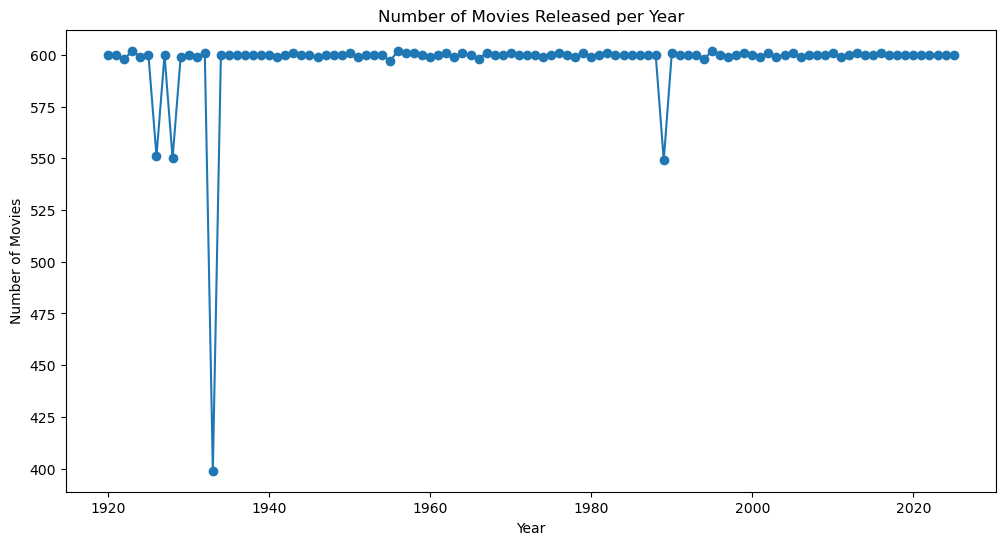

In [36]:
# this shows the number of movies per year in a line plot
# This will give us a count of how many movies were released each year
movies_per_year = moviedata['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


- This visualization shows the number of movies per year in a line plot.

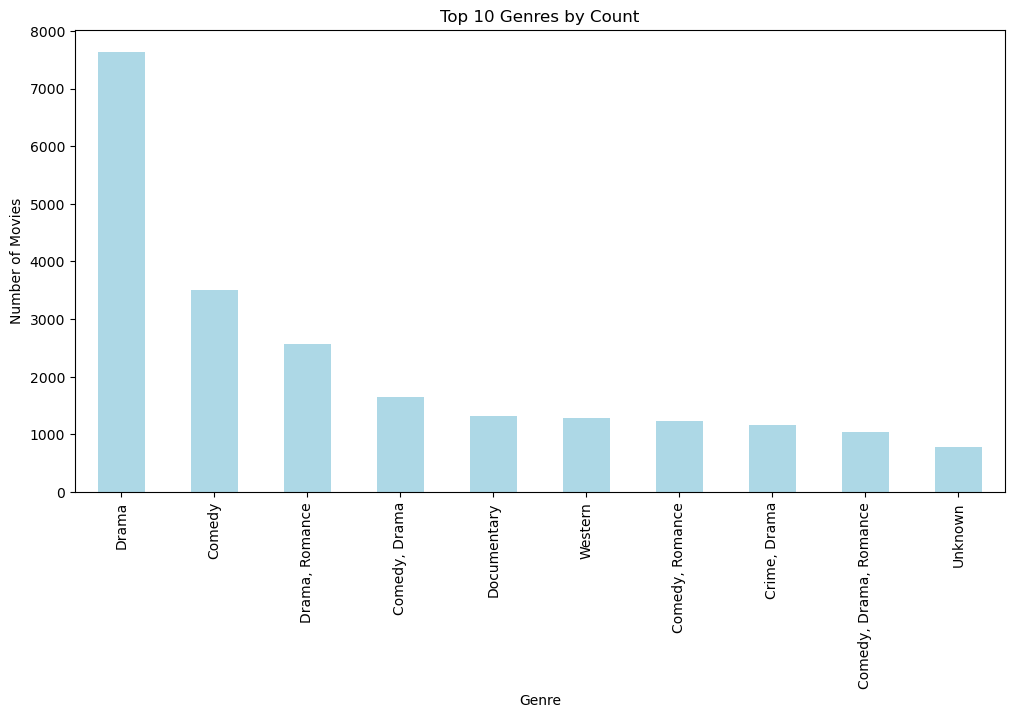

In [37]:
# top 10 genres by count in a bar plot
top_genres = moviedata['genres'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='lightblue')
plt.title('Top 10 Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


- This visualization shows top 10 genres by count in a bar plot

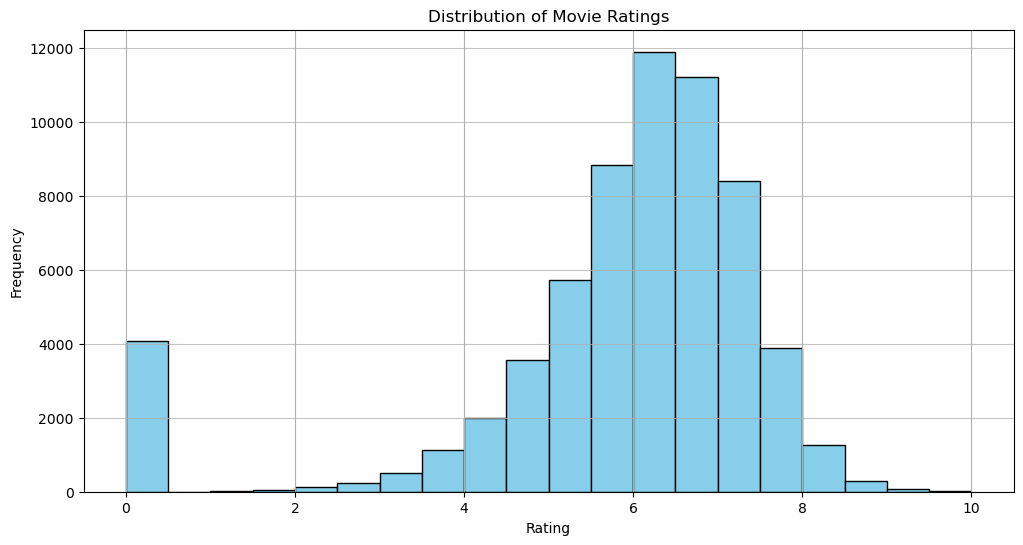

In [38]:
# this shows the distribution of movie ratings in a histogram
plt.figure(figsize=(12, 6))
moviedata['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- This visualization shows the distribution of movie ratings in a histogram

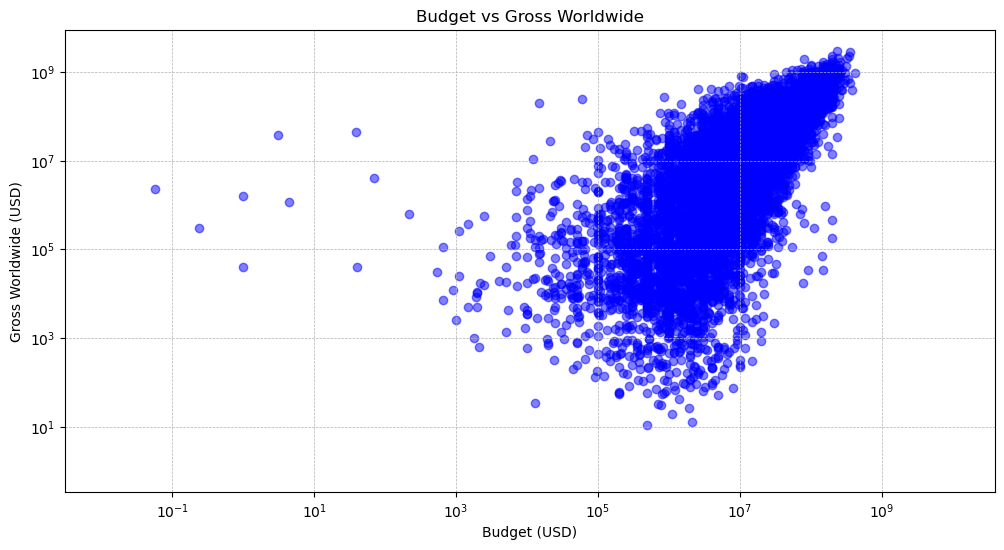

In [39]:
# this shows a scatter plot of budget vs gross worldwide
plt.figure(figsize=(12, 6))
plt.scatter(moviedata['budget_usd'], moviedata['gross_worldwide_usd'], alpha=0.5, color='blue')
plt.title('Budget vs Gross Worldwide')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Worldwide (USD)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


- This visualization shows a scatter plot of budget vs gross worldwide

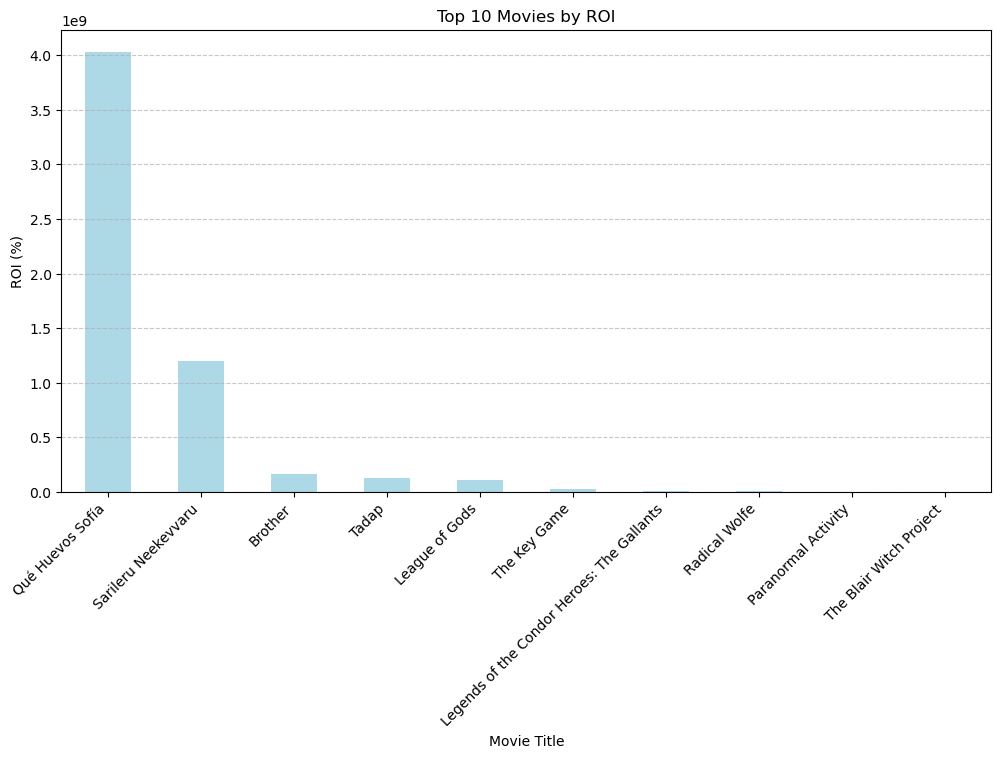

In [40]:
# This shows top 10 movies by roi in a bar plot
plt.figure(figsize=(12, 6))
top_movies_by_roi.set_index('title')['roi'].plot(kind='bar', color='lightblue')
plt.title('Top 10 Movies by ROI')
plt.xlabel('Movie Title')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- This visualization shows top 10 movies by ROI in a bar plot

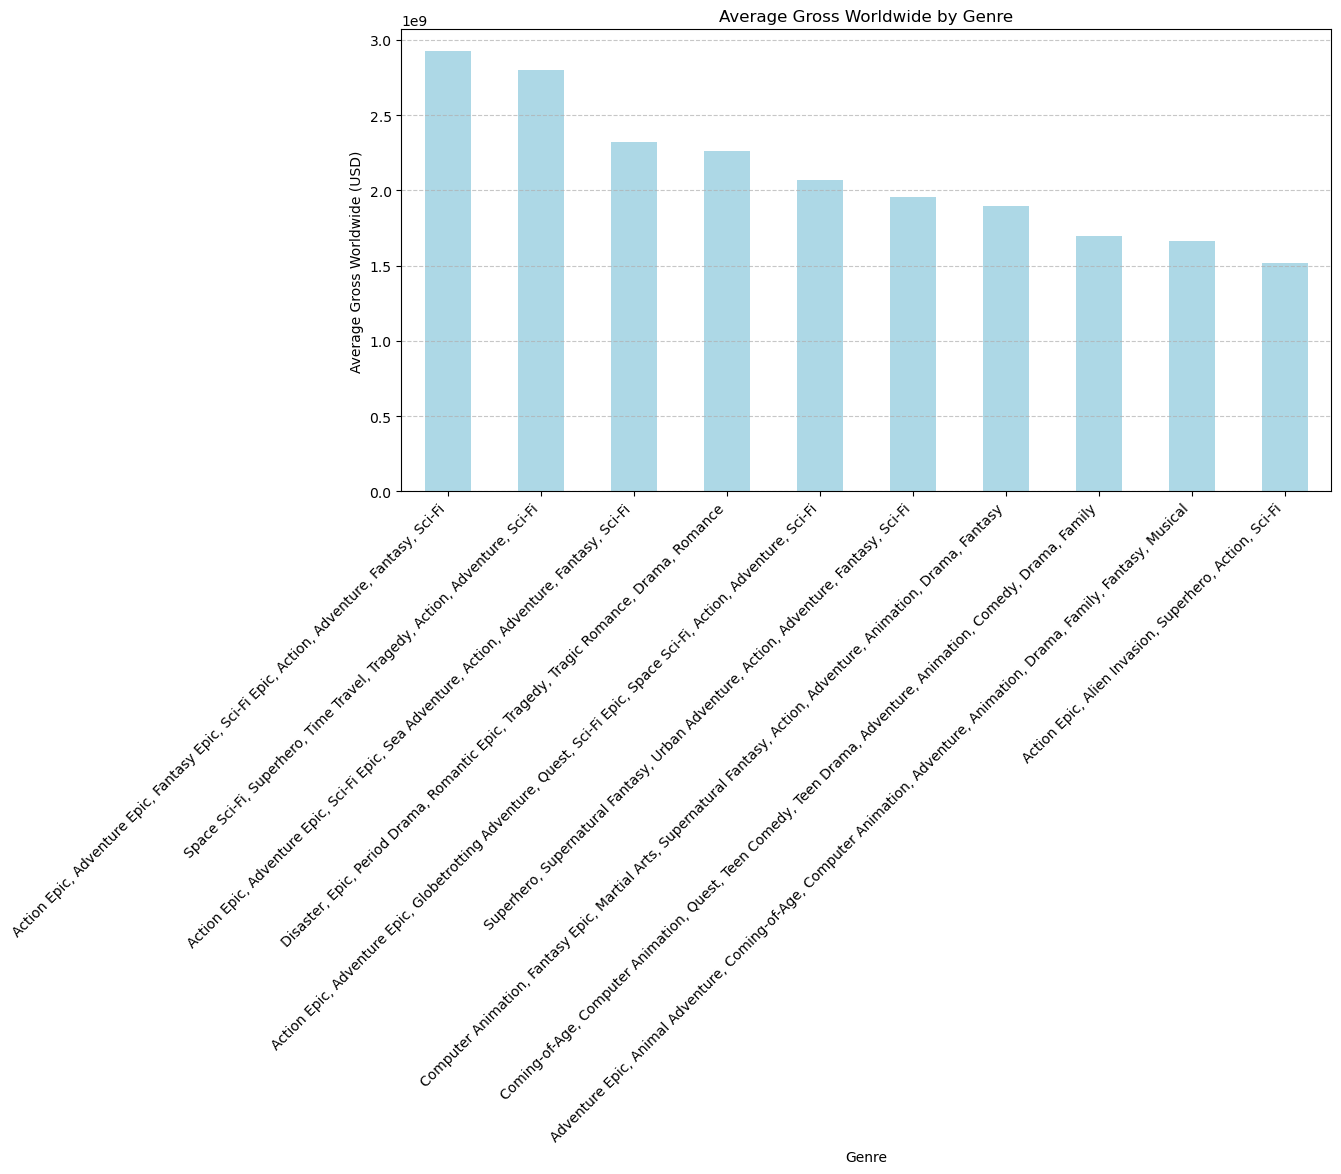

In [41]:
# This shows the avarage gross worldwide by genre in a bar plot
average_gross_by_genre = moviedata.groupby('genres')['gross_worldwide_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6)) 
average_gross_by_genre.plot(kind='bar', color='lightblue')
plt.title('Average Gross Worldwide by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross Worldwide (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

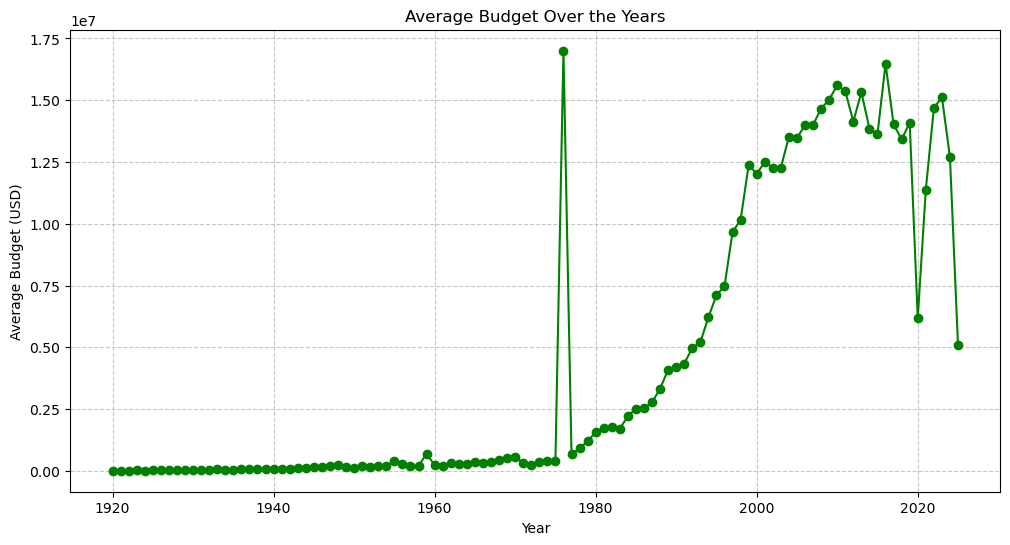

In [42]:
# This shows a line chart of the average budget over the years
average_budget_per_year = moviedata.groupby('year')['budget_usd'].mean()
plt.figure(figsize=(12, 6))
average_budget_per_year.plot(kind='line', marker='o', color='green')
plt.title('Average Budget Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Budget (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


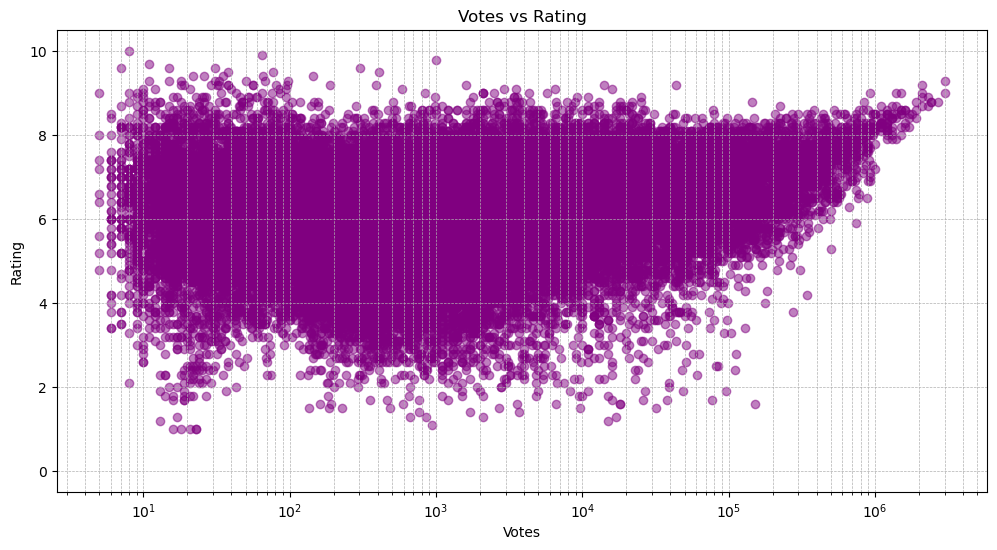

In [43]:
# This shows a line plot of votes vs rating
# this shows if popular movies tend to have higher ratings
plt.figure(figsize=(12, 6))
plt.scatter(moviedata['votes'], moviedata['rating'], alpha=0.5, color='purple')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Recommendations

- Production companies schould put more Focus in marketing budgets on Action, Adventure, Fantasy, and Science Fiction films, as they show consistently strong performance in global box office returns.

- Since budget correlates positively with revenue, production companies should strategically allocate higher budgets to films with strong market potential, while ensuring cost-efficiency to maximize ROI.

- Continous analysis on market trends and historical performance data to identify emerging or resurging genres, especially in fast-growing regions or streaming platforms.

## Conclusion



- On average, approximately 594 movies are produced each year, indicating a consistently high level of film production across the industry.

- There is a positive correlation between a movie's budget and its gross worldwide revenue, suggesting that higher investment often leads to higher returns, although this is not guaranteed and depends on several other factors such as genre, cast, and marketing.

- Action, Adventure, Fantasy, and Science Fiction genres emerged as the best-performing categories in terms of both gross revenue and audience engagement. These genres consistently attract large audiences and tend to have higher production budgets and returns.